# Regression
CMP5101 notes (Tevfik Aytekin)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

# IMPORTANT: You need to download the following file to your computer from here:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
train = pd.read_csv("../datasets/house_prices/train.csv")

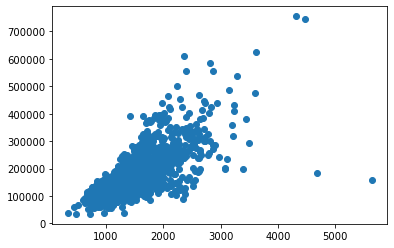

In [2]:
plt.scatter(train.loc[:,"GrLivArea"], train.loc[:,"SalePrice"])

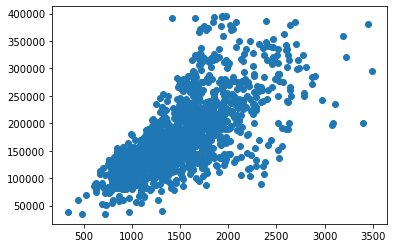

In [3]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
plt.scatter(train2.loc[:,"GrLivArea"], train2.loc[:,"SalePrice"])

(257, 1) (257,)
(29, 1) (29,)


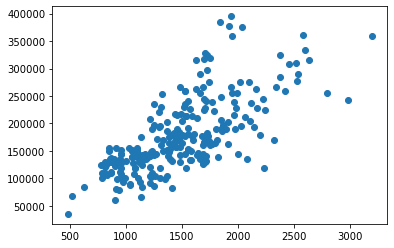

In [4]:
# Take a small sample of the data in order to work with nicer diagrams.
# Make a test / train split

train2 = train2.sample(frac=0.2)
X = train2[['GrLivArea']]
y = train2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

In [5]:
# fit a linear model
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

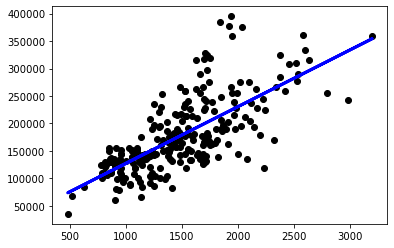

In [6]:
#Plot regression line on training data
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

In [7]:
# Show the intercept and the coefficient of the model (which is a line)
print (model.intercept_)
print (model.coef_)

24106.223751782236
[103.34188126]


In [8]:
def predict(GrLivArea):
    return model.intercept_ + model.coef_*GrLivArea

In [9]:
predict(1000)

array([127448.10501076])

#### Can we interpret the above coefficient as increase in price per square feet?

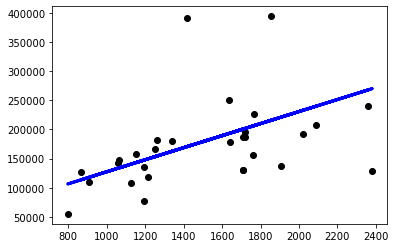

In [10]:
#Plot regression line on test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, test_predictions, color='blue', linewidth=3)

In [11]:
# training and test set mean absolute error (MAE)
print("Training MAE:", mean_absolute_error(y_train, train_predictions))
# or
print(np.mean(np.abs(y_train - train_predictions)))

print("Test MAE:", mean_absolute_error(y_test, test_predictions))


Training MAE: 34935.53213733983
34935.532137339826
Test MAE: 46777.176188535144


In [12]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))

Test MAPE: 29.04396274309422


In [13]:
print("r-squared:", model.score(X_test, y_test))

r-squared: 0.12707823299983279


## The Coefficient of Determination, r-squared ($r^2$)

$r^2$, is the percentage of the dependent variable variation that a model explains. What does this mean? Baseline model predicts always the mean value (a horizontal line). We can find the SSE of the baseline model (call it MSSE). Find the SSE of the regression line (call it RSSE). 

$$r^2 = \frac{(MSSE - RSSE)}{MSSE}$$ 

$r^2$ compares the performance of the model with respect to baseline. If it is 0 it means the model performance is as bad as the baseline, if it is 1 it means that the model performance is perfect. 

What is the range of values can $r^2$ take? Can it be a negative value?

More information is [here](https://onlinecourses.science.psu.edu/stat501/node/255/)

$r$ in $r^2$ refers to Pearson's correlation coefficient. Relation between $r$ and $r^2$ is [here](http://www.win-vector.com/blog/2011/11/correlation-and-r-squared/)


In [15]:
# baseline - predict always the mean SalePrice value

mean_sales_price = y_train.mean()
mean_array = np.ones(y_test.size)*mean_sales_price
print("Baseline (mean) MAE:", mean_absolute_error(y_test, mean_array))
print("Baseline (mean) MAPE:", mean_absolute_percentage_error(y_test, mean_array))


Baseline (mean) MAE: 52325.30081846237
Baseline (mean) MAPE: 36.18888383031403


In [43]:
# Scores according to Kaggle challenge metric
from sklearn.metrics import mean_squared_log_error


def kaggle_score2(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));
def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred)));

print("Test Kaggle-score:", kaggle_score(y_test, test_predictions))
print("Baseline (mean) Kaggle-score:", kaggle_score(y_test,mean_array))


Test Kaggle-score: 0.3470824028303871
Baseline (mean) Kaggle-score: 0.41315976113445785


In [16]:
# Prediction with two input variables

X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']

X.head(5)

,GrLivArea,BedroomAbvGr
0,1710,3
1,1262,3
2,1786,3
3,1717,3
4,2198,4


In [17]:
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['GrLivArea','Bedroom'], model.coef_)).T
print(combined)

Test MAE: 36799.0900605589
Test Kaggle-Score: 0.27791684030434094
Test MAPE: 23.159658469928033
Intercept: 61124.875665130894
[['GrLivArea' '132.5284173833563']
 ['Bedroom' '-28215.115374930003']]


### The coefficient of Bedroom is negative! Does increase in the number of bedrooms negatively effect house price?

Interpretation of linear models are relatively easy (of course one should be careful about the assumptions of the model). For numerical features, changing the numerical feature by one unit changes the prediction by an amount of the size of its coefficient **when all other feature values are fixed**. So, it makes sense for the increase in the number of bedrooms to have a negative effect on sales price when the area is fixed. 

If you only use the BedroomAbvGr feature for prediction things will change.

In [18]:
# Prediction with only Bedroom

X = train.loc[:,['BedroomAbvGr']]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['Bedroom'], model.coef_)).T
print(combined)

Test MAE: 57415.15254681587
Test Kaggle-Score: 0.3977620862388904
Test MAPE: 34.678533170488926
Intercept: 132754.21165906434
[['Bedroom' '16906.44929346109']]


In [19]:
# Run linear regression with top correlated 10 attributes with SalePrice
cors = train.corr(); 
top10 = np.abs(cors.loc[:, "SalePrice"]).sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((top10, model.coef_)).T
print(combined)


Test MAE: 24040.487410665395
Test Kaggle-Score: 0.2804543273979563
Test MAPE: 14.88255850713252
Intercept: -1220207.1041003943
[['OverallQual' '19359.89767598232']
 ['GrLivArea' '56.60718347993233']
 ['GarageCars' '11465.8915890348']
 ['GarageArea' '9.753216462431723']
 ['TotalBsmtSF' '22.99394464860507']
 ['1stFlrSF' '13.122653816954706']
 ['FullBath' '-7339.515407276826']
 ['TotRmsAbvGrd' '-647.7779324400772']
 ['YearBuilt' '267.35231952765645']
 ['YearRemodAdd' '313.2460359841679']]


In [20]:
X.shape

(1460, 10)

In [21]:
# run linear regression with full data
X = train.loc[:,'MSSubClass':'SaleCondition']
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((X.columns, model.coef_)).T
print(combined)

Test MAE: 18295.422215050778
Test Kaggle-Score: 0.1917511984173094
Test MAPE: 11.08182067810568
Intercept: -293353.4556092092
[['MSSubClass' -40.21182278329057]
 ['LotFrontage' 74.03587565584435]
 ['LotArea' 0.8113243537252632]
 ['OverallQual' 6670.062107651694]
 ['OverallCond' 6399.473798569095]
 ['YearBuilt' 351.2416671604514]
 ['YearRemodAdd' 82.80986780540272]
 ['MasVnrArea' 18.185995713564353]
 ['BsmtFinSF1' 17.66209815605967]
 ['BsmtFinSF2' 8.227091995619617]
 ['BsmtUnfSF' -1.4836597541319634]
 ['TotalBsmtSF' 24.405382343780275]
 ['1stFlrSF' 24.89492507100249]
 ['2ndFlrSF' 42.21059644382058]
 ['LowQualFinSF' -39.32805817625369]
 ['GrLivArea' 27.777405286241446]
 ['BsmtFullBath' 505.5590206520158]
 ['BsmtHalfBath' -720.4208925373331]
 ['FullBath' 3564.169000072603]
 ['HalfBath' 1597.6385844458205]
 ['BedroomAbvGr' -4816.936807482651]
 ['KitchenAbvGr' -12925.924310240584]
 ['TotRmsAbvGrd' 1416.9146318567268]
 ['Fireplaces' 3847.2105730204576]
 ['GarageYrBlt' 25.269830544753972]
 ['

[Dummy encoding](https://github.com/tevfikaytekin/data_science/blob/master/collin_dummy.ipynb)

In [22]:
# Cross validation with a single line
X = X.fillna(X.mean()) #!!! Test data is used in the mean
result = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv = 5)
print(result)


[-19046.63011546 -18850.54099706 -19965.80441316 -15996.68770613
 -20272.26396749]


### Scaling (or Standardization)

#### min-max scaling

$$
x_i = \frac{x_i - x_{min}}{x_{max}-x_{min}}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $x_{min}$ is the minimum and $x_{max}$ is the maximum value in $x$. 

In [23]:
# create a DataFrame 
df = pd.DataFrame([[100, 1990, 100000],
                  [120, 2002, 150000],
                  [90, 2012, 120000]],
                 index = [5, 10,15],
                 columns = ["area","built","price"])
df

,area,built,price
5,100,1990,100000
10,120,2002,150000
15,90,2012,120000


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df)
print(scaler.data_max_)
print(scaler.data_min_)

[1.200e+02 2.012e+03 1.500e+05]
[9.00e+01 1.99e+03 1.00e+05]


In [25]:
print(scaler.transform(df))

[[0.33333333 0.         0.        ]
 [1.         0.54545455 1.        ]
 [0.         1.         0.4       ]]


#### Standard scaling

$$
x_i = \frac{x_i - \bar{x}}{s_x}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $\bar{x}$ is the mean of $x$ and $s_x$ is the std of $x$. 

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df)
print(scaler.transform(df))

[[-0.26726124 -1.26012384 -1.13554995]
 [ 1.33630621  0.07412493  1.29777137]
 [-1.06904497  1.18599891 -0.16222142]]


### Example

In [33]:
X = train.loc[:,['LotArea','OverallQual']]
y = train.loc[:,'SalePrice']
#X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# test set should be scaled with the scaler trained on the training set.
X_test_scaled = scaler.transform(X_test)

lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)
test_predictions = model.predict(X_test_scaled)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test Kaggle-score:", kaggle_score(y_test, np.abs(test_predictions)))
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))
print(X_train_scaled)

Test MAE: 27724.860505322587
Test Kaggle-score: 0.2158617521398358
Test MAPE: 16.20411384266846
[[0.04440394 0.77777778]
 [0.04817126 0.44444444]
 [0.07403772 0.33333333]
 ...
 [0.03374699 0.44444444]
 [0.05783262 0.44444444]
 [0.04440394 0.33333333]]


### Overfitting

(38, 1) (38,)
(5, 1) (5,)


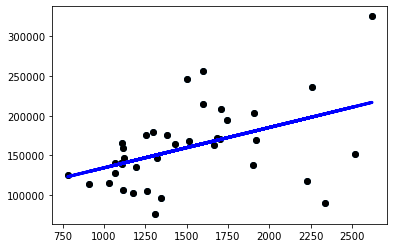

In [34]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train3 = train2.sample(frac=0.03)
X = train3[['GrLivArea']]
y = train3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

model_slr = linear_model.LinearRegression()
model = model_slr.fit(X_train, y_train)
train_predictions = model_slr.predict(X_train)
test_predictions = model_slr.predict(X_test)

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

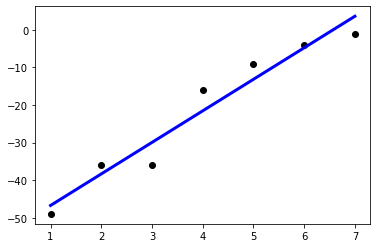

In [35]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)

model = linear_model.LinearRegression()
model = model.fit(X, y)

train_predictions = model.predict(X)

plt.scatter(X, y,  color='black')
plt.plot(X, train_predictions, color='blue', linewidth=3)



[[ 7 49]
 [ 6 36]
 [ 5 25]
 [ 4 16]
 [ 3  9]
 [ 2  4]
 [ 1  1]]
[13.25       -0.60714286]
-62.4285714285714


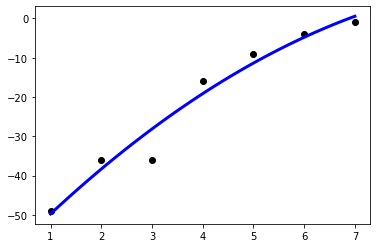

In [36]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2]
model = linear_model.LinearRegression()
model = model.fit(X, y)
X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(X)
print(model.coef_)
print(model.intercept_)

[ 3.92548440e+00  7.13912845e+00  6.47138798e+00 -4.98518482e-01
 -6.85905697e+00  4.26587424e+00 -1.05595717e+00  1.19355760e-01
 -5.11404786e-03]
-62.50258416955434


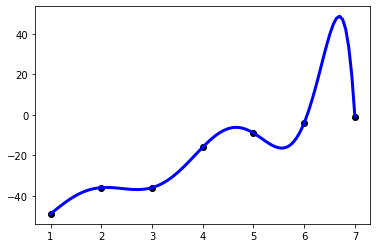

In [37]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.LinearRegression()
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### Ridge Regression

[ 3.07391854e-01  5.77397076e-01  5.77329049e-01  1.04592385e-01
 -4.04882677e-01  2.54198846e-01 -6.78184427e-02  8.18085019e-03
 -3.67852344e-04]
-47.31663662400673


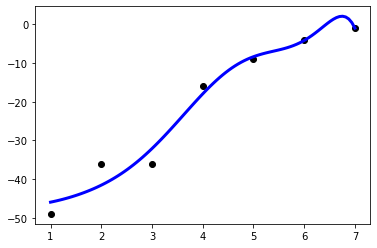

In [38]:
from sklearn.linear_model import Ridge
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.Ridge(alpha=5)
# play with the value of alpha and see its effect.
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### PolynomialFeatures method in Python

In [39]:
from sklearn.preprocessing import PolynomialFeatures
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.fillna(X.mean())
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
print(X);

Test MAE: 36536.50018683107
Test Kaggle-Score: 0.27654407983037277
Test MAPE: 23.132907824138996
Intercept: -1723.8675470408925
[[1.710000e+03 3.000000e+00 2.924100e+06 5.130000e+03 9.000000e+00]
 [1.262000e+03 3.000000e+00 1.592644e+06 3.786000e+03 9.000000e+00]
 [1.786000e+03 3.000000e+00 3.189796e+06 5.358000e+03 9.000000e+00]
 ...
 [2.340000e+03 4.000000e+00 5.475600e+06 9.360000e+03 1.600000e+01]
 [1.078000e+03 2.000000e+00 1.162084e+06 2.156000e+03 4.000000e+00]
 [1.256000e+03 3.000000e+00 1.577536e+06 3.768000e+03 9.000000e+00]]


### Batch Gradient Descent Implementation

In [40]:
def cost(X,y,w,b):
    return np.sum(np.abs((np.dot(X,w) + b) - y))/X.shape[0]

In [41]:
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.to_numpy()
y = y.to_numpy()
scaler = MinMaxScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

In [44]:
y.shape
y = y.reshape(y.size, 1)
y.shape

(1460, 1)

In [57]:
import copy

n_features = 2
learning_rate = 0.03
n_iter=200
m = X.shape[0]
w = np.random.rand(n_features,1)
b = np.random.rand()
y = y.reshape(y.size, 1)
cost_array = []

for iter in range(n_iter):
    c = cost(X,y,w,b)
    cost_array.append(c) 
    print(c)
    w_back = copy.deepcopy(w)
    for j in range(n_features): 
        dw = 0;
        db = 0;
        for i in range(m):
            dw=dw+(y[i] - (np.dot(X[i].reshape([1,2]),w_back) + b))*X[i,j]
        w[j] = w_back[j] + learning_rate * dw/m;
        
    for i in range(m):
        db=db+(y[i] - (np.dot(X[i].reshape([1,2]),w_back) + b))
    b = b + learning_rate * db/m;

180920.13502697868
174474.99895093578
168258.07864211567
162261.29384075297
156476.85037835117
150897.23004827875
145515.18083500926
140330.01718334353
135349.30271704402
130549.66828831079
125919.98354794065
121470.57667396456
117199.49342874583
113097.83355154558
109161.31544936997
105376.57923267005
101754.16234721146
98291.92781305643
94992.0733944751
91868.85051675129
88930.24639959048
86159.88034974421
83546.05174042725
81060.56323253395
78698.46365477129
76485.23040617228
74399.5426255718
72427.8410976604
70609.15755046596
68937.26423764398
67369.4049035165
65911.87585085172
64571.43842128144
63344.55950396492
62230.43549316891
61228.043127338344
60320.62218623582
59501.61717452412
58758.26659168499
58087.76967469761
57475.288800159055
56920.77381890331
56421.806686318196
55966.88150610779
55555.02894315671
55188.0527027847
54858.33909331503
54568.089881512846
54311.35055255306
54079.721921205666
53867.2258510237
53679.63358798841
53513.11234510642
53361.289795418095
53231.64432

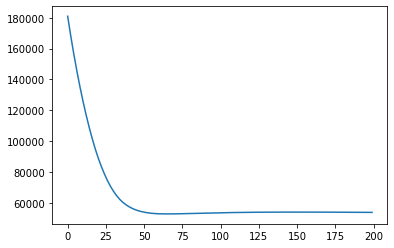

In [58]:
plt.plot(cost_array)

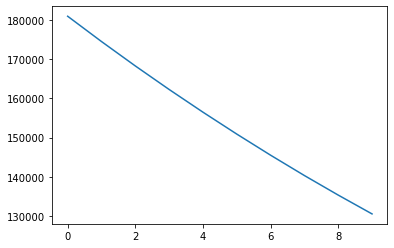

In [59]:
plt.plot(cost_array[:10])